 **Atividade 3.4 - Hamilton Celerino da Fonseca Neto**

# Import e Dataset

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.datasets import MNIST


In [ ]:
dataset_dir = 'MNIST/'

# Transform to Tensor (normaliza automaticamente para [0,1])
transform = transforms.ToTensor()

dataset_train = MNIST(dataset_dir, train=True, download=True, transform=transform)

print("Número total de amostras de treino:", len(dataset_train))


Número total de amostras de treino: 60000


#Parâmetros

In [ ]:
def create_model():
    return torch.nn.Linear(28*28, 10)

# Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando device:", device)

# Parâmetros de treinamento
n_epochs = 3
learning_rate = 0.5
criterion = torch.nn.CrossEntropyLoss()


Usando device: cpu


In [ ]:
batch_sizes = [32, 100, 256]
loss_histories = {}

for batch_size in batch_sizes:
    print(f"\n=== Treinando com batch_size = {batch_size} ===")

    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    print("Número de minibatches:", len(loader_train))

    model = create_model().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    losses_per_batch = []

    for epoch in range(1, n_epochs+1):
        for batch_idx, (x_batch, y_batch) in enumerate(loader_train, 1):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            inputs = x_batch.view(-1, 28*28)

            outputs = model(inputs)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Armazena a perda
            losses_per_batch.append(loss.item())

            # Print de cada minibatch
            print(f"Época: {epoch}/{n_epochs}, batch: {batch_idx}/{len(loader_train)}, loss: {loss.item():.4f}", end='\r')

        # Print final da época
        print(f"\nFim da época {epoch}/{n_epochs}, última loss: {loss.item():.4f}")

    # Salva histórico
    loss_histories[batch_size] = losses_per_batch



=== Treinando com batch_size = 32 ===
Número de minibatches: 1875
Época: 1/3, batch: 1875/1875, loss: 0.0876
Fim da época 1/3, última loss: 0.0876
Época: 2/3, batch: 1875/1875, loss: 0.3454
Fim da época 2/3, última loss: 0.3454
Época: 3/3, batch: 1875/1875, loss: 0.0967
Fim da época 3/3, última loss: 0.0967

=== Treinando com batch_size = 100 ===
Número de minibatches: 600
Época: 1/3, batch: 600/600, loss: 0.2677
Fim da época 1/3, última loss: 0.2677
Época: 2/3, batch: 600/600, loss: 0.4664
Fim da época 2/3, última loss: 0.4664
Época: 3/3, batch: 600/600, loss: 0.4578
Fim da época 3/3, última loss: 0.4578

=== Treinando com batch_size = 256 ===
Número de minibatches: 235
Época: 1/3, batch: 235/235, loss: 0.2914
Fim da época 1/3, última loss: 0.2914
Época: 2/3, batch: 235/235, loss: 0.2737
Fim da época 2/3, última loss: 0.2737
Época: 3/3, batch: 235/235, loss: 0.3509
Fim da época 3/3, última loss: 0.3509


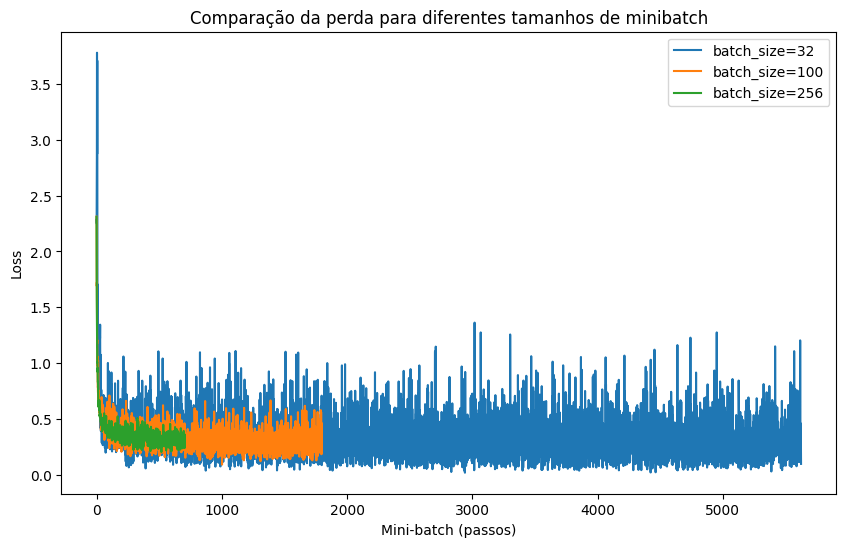

In [ ]:
plt.figure(figsize=(10,6))

for batch_size, losses in loss_histories.items():
    plt.plot(np.arange(len(losses)), losses, label=f'batch_size={batch_size}')

plt.xlabel('Mini-batch (passos)')
plt.ylabel('Loss')
plt.title('Comparação da perda para diferentes tamanhos de minibatch')
plt.legend()
plt.show()


In [ ]:
batch_sizes = [32, 100, 256]
loss_histories = {}

for batch_size in batch_sizes:
    print(f"\n=== Treinando com batch_size = {batch_size} ===")

    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    print("Número de minibatches:", len(loader_train))

    model = create_model().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Para armazenar perdas
    losses_per_batch = []

    for epoch in range(1, n_epochs+1):
        epoch_loss = 0.0

        for batch_idx, (x_batch, y_batch) in enumerate(loader_train, 1):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            inputs = x_batch.view(-1, 28*28)

            outputs = model(inputs)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Armazena a perda
            losses_per_batch.append(loss.item())
            epoch_loss += loss.item()

            # Print de cada minibatch
            print(f"Época: {epoch}/{n_epochs}, batch: {batch_idx}/{len(loader_train)}, loss: {loss.item():.4f}")


A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 2/3, batch: 1262/1875, loss: 0.2624
Época: 2/3, batch: 1263/1875, loss: 0.7493
Época: 2/3, batch: 1264/1875, loss: 0.4875
Época: 2/3, batch: 1265/1875, loss: 0.1433
Época: 2/3, batch: 1266/1875, loss: 0.2110
Época: 2/3, batch: 1267/1875, loss: 0.0666
Época: 2/3, batch: 1268/1875, loss: 0.3173
Época: 2/3, batch: 1269/1875, loss: 0.5743
Época: 2/3, batch: 1270/1875, loss: 0.1886
Época: 2/3, batch: 1271/1875, loss: 0.5722
Época: 2/3, batch: 1272/1875, loss: 0.4635
Época: 2/3, batch: 1273/1875, loss: 0.1121
Época: 2/3, batch: 1274/1875, loss: 0.1830
Época: 2/3, batch: 1275/1875, loss: 0.1629
Época: 2/3, batch: 1276/1875, loss: 0.3189
Época: 2/3, batch: 1277/1875, loss: 0.1056
Época: 2/3, batch: 1278/1875, loss: 0.9915
Época: 2/3, batch: 1279/1875, loss: 0.2852
Época: 2/3, batch: 1280/1875, loss: 0.2440
Época: 2/3, batch: 1281/1875, loss: 0.3324
Época: 2/3, batch: 1282/1875, loss: 0.1966
Época: 2/3, batch: 1283/1875, loss: 0.

#Perguntas

## 1. Qual é o tamanho do mini-batch?


O mini-batch é o número de amostras processadas pelo modelo de cada vez antes de atualizar os pesos. No código, definimos três tamanhos diferentes de mini-batch: 32, 100 e 256. Ou seja, dependendo da configuração escolhida, cada mini-batch contém 32, 100 ou 256 imagens do dataset.

## 2. Em uma época, quantos mini-batches existem?


Uma época corresponde a uma passagem completa pelo dataset. O número de mini-batches em cada época depende do tamanho do mini-batch e do número total de amostras do dataset (60.000 no MNIST). Ele é calculado como o número total de amostras dividido pelo tamanho do mini-batch, arredondado para cima se necessário. Por exemplo:

Batch size 32 → ~1.875 mini-batches por época

Batch size 100 → 600 mini-batches por época

Batch size 256 → ~235 mini-batches por época

## 3. Qual é a definição de época?


É definida como o momento em que o modelo já processou todas as amostras do dataset uma vez, independentemente do tamanho do mini-batch. Ou seja, uma época completa garante que cada amostra do dataset foi utilizada pelo menos uma vez no treinamento.